In [1]:
import os

try:
    has_changed_dir
except:
    has_changed_dir = False

try:
    import google.colab
    IN_COLAB = True
    print("Running as a Colab notebook")
except:
    IN_COLAB = False

if IN_COLAB:
    %pip install datasets
    %pip install translate-toolkit
    #%pip install bitsandbytes

    !git clone https://github.com/MartinKirkegaardDK/KDS_MI.git

    if not has_changed_dir:
        os.chdir('KDS_MI/refactor')
        has_changed_dir = True
else:
    if not has_changed_dir:
        os.chdir('.')
        has_changed_dir = True

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from utils.compatibility import *
from utils.hooking import *
from utils.data import *

from PCA import *

from torch.utils.data import DataLoader
from transformers import AutoModelForCausalLM, AutoTokenizer

In [5]:
url = 'EleutherAI/pythia-14m'
model = AutoModelForCausalLM.from_pretrained(url)
tokenizer = AutoTokenizer.from_pretrained(url)

ds = load_antibiotic_data(FilePaths.antibiotic)
loader = DataLoader(ds, shuffle=True, batch_size=32)

In [6]:
activations = get_activations(
    loader,
    model,
    tokenizer,
    layers=[1,2,4],
    hook_addresses=[HookAddress.attention_pre, HookAddress.attention_post],
    max_batches=10,
    sampling_prob=0.2
)

  8%|▊         | 11/130 [00:19<03:33,  1.80s/it]


In [9]:
HookAddress.attention_pre.layer(2)

'layer.2.attention:pre'

In [13]:
activations[HookAddress.attention_pre.layer(2)]

  8%|▊         | 11/130 [00:14<02:33,  1.29s/it]


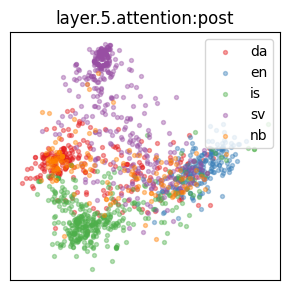

In [ ]:
main('EleutherAI/pythia-14m', 
     'cpu',
     layers=[5],
     hook_addresses=[HookAddress.attention_post, ],
     out_file='out.png',
     layers_per_fig=2,
     max_batches=10,
     sample_prob=0.1)


In [21]:
len(activations['layer.0.layernorm_1:pre'])

7760

In [106]:
random.random()

0.7202847418806237

In [104]:
with HookManager(model) as hook_manager:
    extracted = hook_manager.extract(HookAddress.layernorm_1_pre.layer(2))

    for idx, batch in enumerate(loader):
        if idx > 0:
            break

        tokenized = tokenizer(
            batch[0],
            padding=True,
            truncation=True,
            return_tensors='pt'
        ).to(Device.device(model))

        model(**tokenized)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


ValueError: Asking to pad but the tokenizer does not have a padding token. Please select a token to use as `pad_token` `(tokenizer.pad_token = tokenizer.eos_token e.g.)` or add a new pad token via `tokenizer.add_special_tokens({'pad_token': '[PAD]'})`.

In [95]:
activations = get_activations(
    loader,
    model,
    tokenizer,
    hook_addresses=[HookAddress.mlp_post],
    max_batches=5
)

  5%|▍         | 6/130 [00:21<07:30,  3.63s/it]
